<a href="https://colab.research.google.com/github/Requenamar3/Machine-Learning/blob/main/CAP4633C_Assigment2_Spring25_Group2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CAP 4633C. Spring 2025

**ASSIGNMENT 2**

GROUP 1:

***Aurisabel Fereira***

***Anais Garcia***

***Martha Requena***

---


# Question 1 (20 points):

---

Read the scientific article titled “Application of Binary Logistic Regression in Clinical Research”. Here is a link to download this article:

https://drive.google.com/file/d/1boKO1vNA8ZhdGmikbnYUoa1vvJy90x18/view?usp=sharing

Answer the following questions based on what you read in this article:

---

a) What’s the difference between binary logistic regression and ordinal logistic regression? Explain


binary logistic regression is used when the outcome variable can have only two categories, (e.g., disease present vs. disease absent, dead vs. alive).

Ordinal logistic regression is used if the outcome variable have more than two categories which are ordered (e.g., poor, fair, good, very good, excellent).



a1) Find an example online, different from the example discussed in the article, where ordinal logistic regression is applied. Briefly discuss this example.

Education Level (High school, Bachelor, Master and PhD) is an ordinal variable because the categories follow a ranked order. A PhD represents a higher level of education than a Master, which is higher than a Bachelor, and so on.

Ordinal logistic regression is useful for analyzing factors that influence education level, such as income, parental education, or access to resources.


---

__b)__ In equation (4) (page 10), what do you get once you plug in the values of a person’s age and smoking status?

Note: Your answer CANNOT be that you get the “Logit (CVD status)”. In other words, you need to explain what Logit (CVD status) means.


The dataset consists of smoking status and age in years of 250 subjects.

 85 (34%) are suffering from cardiovascular disease (CVD)

 165 (66%) are healthy

 The  model would like to see whether the smoking status and age have any effect on developing CVD.

The outcome variable (Y) here is CVD status (1=yes, 0=no)

predictors:

 * smoking status (1= yes, 0=no)
 * age.

And the formula is:


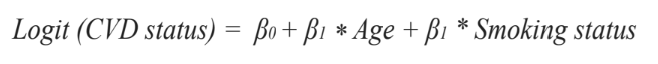

The formula based on the results of the logistic regression model is:

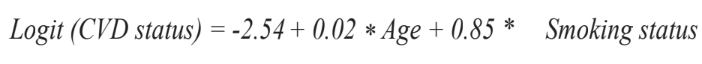

Both predictors Age and Smoking status are related to cardiovascular disease.

2.54 is the intercept, it represent the baseline risk of cardiovascular disease when both Age and smoking status are zero.

0.02 indicates that Age has a small positive effect on the risk of cardiovascular disease, meaning each additional year of age slightly increases the risk.

0.85  shows that Smoking has a much larger effect on the risk, with smokers being at significantly higher risk for cardiovascular disease compared to non-smokers.


---


__c)__ Explain what the concept of odds ratio means. As you explain this concept, illustrate it with the examples of odd ratios discussed in the article.



Odds Ratio is a statistical measure that quantifies the strength of the association between two events, often used in the context of logistic regression. It compares the odds of an event occurring in one group with the odds of the event occurring in another group.

The odds of an event happening are defined as the ratio of the probability that the event occurs to the probability that it does not occur. For example, if the probability of an event happening is p, then the odds are: p/(1-p).

Also, we know that the simplest form of logistic regression model  is:


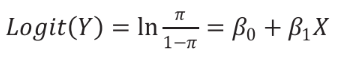

and:

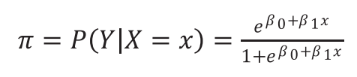

then:

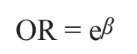

meaning if OR is


*   > 1, predictors associated with increased risk of outcome
*   =1, no association between predictor and outcome
*   < 1, predictor associated with decreased risk outcome





illustating Odds Ratio with cardiovascular disease, we want to understand how Smoking Status impacts the odds of having cardiovascular disease. For example, from the logistic regression model, we have a coefficient for Smoking Status of 0.85, meaning the odds of developing cardiovascular disease are exp(0.85) times higher for smokers compared to non-smokers. The odds ratio for smoking is

e**(coefficient for smoking status) =  c**0.85 = 2.34

An odds ratio of 2.34 means that smokers are 2.34 times more likely to develop cardiovascular disease than non-smokers


---

__d)__ Read Figure 1 (page 9). In the “Model” section of Figure 1, you can read this statement:

“Predictors/ independent variables can be continuous or categorical”

Is this statement correct? If it is incorrect, explain why. If it is correct, illustrate its correctness with one example we have done in class.

Yes, the statement is correct. When continuous variables are included, the model estimates the effect of a one-unit increase in that variable on the log-odds of the outcome. For example, in a model predicting diabetes in the Female Pima Indians dataset, age could be a continuous predictor, where the model would estimate how much the odds of having diabetes change with each additional year of age.

When categorical variables are included (e.g., "student" in the default dataset), they can also be used in logistic regression. However, since the model requires numeric inputs, categorical variables are typically converted into dummy variables during preprocessing. Each category in the categorical variable is transformed into a separate binary (0 or 1) variable. For example, in the default dataset, if the student status is "Yes" or "No," it would be converted into a binary variable where 0 represents "non-student" and 1 represents "student."


---


Dataset for questions 2 and 3

For both questions, you will use the Bank Deposit data frame. The “bank_deposit.csv” file is available on Canvas.

This dataset collects multiple features of bank clients and whether each customer has subscribed for a term deposit (binary: 'yes','no').


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, f1_score, make_scorer

In [ ]:
# Importing the function to apply logistic regression

from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Use the following code in a Colab notebook to create the Bank Deposit data frame:

In [ ]:
bank_dep_data_path= '/content/drive/MyDrive/dataset/bank_deposit.csv'

In [ ]:
bank_deposit_df= pd.read_csv(bank_dep_data_path, delimiter = ';')

In [ ]:
bank_deposit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [ ]:
#The new dataset bank_deposit_reduced_df has the 1st, 12th, 15th, 16th, 17th, 18th, 19th, 20th, and 21st columns
bank_deposit_reduced_df= bank_deposit_df.iloc [:, [0,11,14,15,16,17,18,19,20]].copy()

In [ ]:
bank_deposit_reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   campaign        4119 non-null   int64  
 2   poutcome        4119 non-null   object 
 3   emp.var.rate    4119 non-null   float64
 4   cons.price.idx  4119 non-null   float64
 5   cons.conf.idx   4119 non-null   float64
 6   euribor3m       4119 non-null   float64
 7   nr.employed     4119 non-null   float64
 8   y               4119 non-null   object 
dtypes: float64(5), int64(2), object(2)
memory usage: 289.7+ KB


In [ ]:
bank_deposit_reduced_df.head()

,age,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,2,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,4,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,1,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,3,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,1,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [ ]:
#convert the categorical column 'poutcome' into 1 or 0
bank_deposit_dummies_df= pd.get_dummies(bank_deposit_reduced_df,columns=['poutcome'], drop_first= False)

In [ ]:
bank_deposit_dummies_df.head()

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,2,-1.8,92.893,-46.2,1.313,5099.1,no,False,True,False
1,39,4,1.1,93.994,-36.4,4.855,5191.0,no,False,True,False
2,25,1,1.4,94.465,-41.8,4.962,5228.1,no,False,True,False
3,38,3,1.4,94.465,-41.8,4.959,5228.1,no,False,True,False
4,47,1,-0.1,93.200,-42.0,4.191,5195.8,no,False,True,False


In [ ]:
#Removes the column 'poutcome_nonexistent'
bank_deposit_dummies_df.drop(['poutcome_nonexistent'], axis= 1, inplace=True)

In [ ]:
bank_deposit_dummies_df.head()

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,poutcome_failure,poutcome_success
0,30,2,-1.8,92.893,-46.2,1.313,5099.1,no,False,False
1,39,4,1.1,93.994,-36.4,4.855,5191.0,no,False,False
2,25,1,1.4,94.465,-41.8,4.962,5228.1,no,False,False
3,38,3,1.4,94.465,-41.8,4.959,5228.1,no,False,False
4,47,1,-0.1,93.200,-42.0,4.191,5195.8,no,False,False


After you have run the previous lines of code, the data frame bank_deposit_dummies_df will be ready with all the columns you need. In this data frame, there are 10 columns: nine are predictors and the outcome (which is column y (the eighth column)).

#Question 2 (40 points)

Apply Random Forest. You must follow the following steps to apply this technique:

Split the data into 80% training and 20% testing.

*   Split the data into 80% training and 20% testing.





In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
# Defining independent variables (X) and dependent variable (y)
X= bank_deposit_dummies_df.drop ('y', axis= 1)

In [ ]:
y= bank_deposit_dummies_df['y']

In [ ]:
# Split data into training and testing sets (80% train, 20% test)
# Stratify ensures the target variable distribution is preserved in both sets
X_train, X_test, y_train, y_test= train_test_split (X, y, test_size = 0.2, random_state = 1, stratify = y)

Use the training data and cross validation via a grid search to select the best value for:

The number of trees in the random forest. Try two possible values, 500 and 1000.
The number of features to use when constructing each individual forest tree. Try three possible values: p/3, 6, and p.
Use Entropy as the criterion to grow the trees.
The class weighs. Try two values, None and “balanced”.
Use accuracy as the metric to select the best hyperparameter values.


In [ ]:
#reduce values but you can use more
number_of_trees_rf = np.array ([500, 1000]) # Only two options to minimize comp time

In [ ]:
# We have three features in the Default dataset, we use all because is not complex

number_of_features = np.array ([1,2,3])

In [ ]:
p = X.shape[1]  # Number of features
# Define the three possible values
number_of_features = np.array([int(p / 3), 6, p])

In [ ]:
criterion_options = ['entropy']

In [ ]:
class_weight_options = ['balanced', None]

In [ ]:
hyperparam_grid_rf = {
    'criterion': criterion_options,
    'n_estimators': number_of_trees_rf,
     'max_features': number_of_features,
    'class_weight': class_weight_options
}

In [ ]:
cv_object = KFold (n_splits= 3, shuffle= True, random_state= 1)

In [ ]:
#highest accuracy
grid_search_setting_rf = GridSearchCV(RandomForestClassifier(random_state=1), hyperparam_grid_rf, cv= cv_object, scoring='accuracy')

__a)__ (20 points) After you have selected the best hyperparameter values, use them to fit a forest to the training data. Use this forest to predict the test data and show the classification report obtained on the test data.

In [ ]:
grid_search_setting_rf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(random_state=1),
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['entropy'],
                         'max_features': array([3, 6, 9]),
                         'n_estimators': array([ 500, 1000])},
             scoring='accuracy')

In [ ]:
print('Parameters: ', grid_search_setting_rf.best_params_)

Parameters:  {'class_weight': None, 'criterion': 'entropy', 'max_features': np.int64(3), 'n_estimators': np.int64(1000)}


In [ ]:
rf= RandomForestClassifier(class_weight = None, criterion ='entropy', max_features = 3, n_estimators = 1000, random_state = 1)

In [ ]:
rf.fit (X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=3, n_estimators=1000,
                       random_state=1)

In [ ]:
y_pred_rf = rf.predict (X_test)

In [ ]:
confusion_matrix(y_test, y_pred_rf)

array([[706,  28],
       [ 64,  26]])

In [ ]:
print (classification_report (y_test, y_pred_rf))

              precision    recall  f1-score   support

          no       0.92      0.96      0.94       734
         yes       0.48      0.29      0.36        90

    accuracy                           0.89       824
   macro avg       0.70      0.63      0.65       824
weighted avg       0.87      0.89      0.88       824



__b)__ (10 points) Show the calculations you need to perform to get the Recall shown in the classification report for both the ‘no’ and ‘yes’ classes. You need to show the actual numbers involved in the calculation AND the operation you need to perform to get both of these metrics.

Following the confussion matrix, we have:

True Negative (TN) = 706

False Positives (FP) = 28

False Negatives (FN) = 64

True Positives (TP) = 26

N= TN+FP

Then __Recall for 0 class(No)__ = TN/N =

Recall = True Positives / (True Positives + False Negatives)

<font color="red">**Recall for the NO prediction**
  - Correct "No" predictions = **706**
  - Total actual "No" = **706 + 28 = 734**
  - Recall = **706 / 734 = 0.961852 or 96%**</font>


In [ ]:
#Recall for the NO prediction
706/(706+28)

0.9618528610354223

<font color="red">**Recall for the YES prediction**
  - Correct "Yes" predictions = **26**
  - Total actual "Yes" = **26 + 64 = 90**
  - Recall = **26 / 90 = 0.2888888 or 29%**</font>


In [ ]:
#recall for the YES prediction
26/(26+64)

0.28888888888888886

__c)__ (5 points) Do you think this classifier will allow you to correctly predict whether future clients will subscribe to a term deposit with at least 90% accuracy? Justify your answer.

***
***

<font color="red">The classifier has 89% accuracy, just below the 90% goal. However, since most customers don’t subscribe, the high accuracy is mainly due to correctly predicting them (96% recall). But it only identifies 29% of actual subscribers, making it __unreliable for predicting future subscribers__</font>


***
***

__d)__ (5 points) Challenge question (i.e., you cannot ask me how to answer it)

Among all the predictors, list the three predictors that were less likely to be part of the trees that form the forest. Justify why you selected these predictors.

Note: The question says “less likely” because, in principle, every predictor can be part of a forest tree (and each predictor will likely be part of at least one tree from the forest). However, we know there are predictors more likely to show up regularly in the forest trees.


In [ ]:
df_feature_imp_rf = pd.Series(data= rf.feature_importances_, index= X_train.columns, name= "Predictor Importance in Forest")


In [ ]:

df_feature_imp_rf.sort_values(ascending=False)

,Predictor Importance in Forest
age,0.345131
euribor3m,0.278741
campaign,0.122034
nr.employed,0.085893
cons.conf.idx,0.042032
poutcome_success,0.036357
emp.var.rate,0.035951
cons.price.idx,0.033132
poutcome_failure,0.020730


We look at the feature importance scores to see how much each predictor helps the model. The three predictors with the lowest feature importance score, meaning they have less impact on the outcome, are __emp.var.rate, cons.price.idx, and poutcome_failure__.

***
***

<font color="red">We look at the feature importance scores to see how much each predictor helps the model. The three predictors with the lowest feature importance score, meaning they have less impact on the outcome, are __emp.var.rate, cons.price.idx, and poutcome_failure__.</font>


***
***

#Question 3 (40 points)

Use the results of the train-test split from question 2

a) (16 points) Apply Logistic Regression without tuning any hyperparameter and only by setting class_weight='balanced'.


In [ ]:
from sklearn.pipeline import Pipeline # This allows us to sep up a pipeline to do the preprocessing
from sklearn.preprocessing import StandardScaler # Used to standardize the predictors
from sklearn.compose import ColumnTransformer # This allows to standardize only the non-dummy predictors.
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train.head()

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,poutcome_failure,poutcome_success
1594,47,3,1.4,93.444,-36.1,4.963,5228.1,False,False
2197,34,4,1.4,93.444,-36.1,4.963,5228.1,False,False
1270,33,2,-0.1,93.200,-42.0,4.191,5195.8,False,False
673,25,1,-3.4,92.379,-29.8,0.809,5017.5,False,True
3919,57,1,-1.8,92.893,-46.2,1.299,5099.1,False,False


In [ ]:
y_train.head()

,y
1594,no
2197,no
1270,no
673,no
3919,no


In [ ]:
# Create a pipeline
lr_balanced = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features for better model performance
    ('log_reg', LogisticRegression(class_weight='balanced', random_state=1, max_iter=500))  # Apply logistic regression
])

In [ ]:
# Train the model
lr_balanced.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(class_weight='balanced', max_iter=500,
                                    random_state=42))])

In [ ]:
y_lr_balanced = lr_balanced.predict(X_test)

In [ ]:
confusion_matrix (y_test, y_lr_balanced)

array([[579, 155],
       [ 31,  59]])

In [ ]:
print (classification_report (y_test, y_lr_balanced))

              precision    recall  f1-score   support

          no       0.95      0.79      0.86       734
         yes       0.28      0.66      0.39        90

    accuracy                           0.77       824
   macro avg       0.61      0.72      0.62       824
weighted avg       0.88      0.77      0.81       824



Observe the prediction performance of the Logistic Regression model that you obtained on the test data. If you want to minimize the classifier's overall prediction error rate, which classifier is better, Logistic Regression or the Random Forest from question 2? Justify your answer.

***
***

<font color="red">To minimize the overall prediction error rate, we should choose the classifier with the higher accuracy, since error rate is calculated as:

**Error Rate = 1 - Accuracy**

- Error Rate for Random Forest = 1 - 0.89 = **0.11** (11%)
- Error Rate for Logistic Regression = 1 - 0.77 = **0.23** (23%)

Since **Random Forest has a lower error rate (11%)** compared to Logistic Regression (23%), it’s clearly the better choice for minimizing overall prediction errors..</font>

***
***

__b)__ (16 points) Apply Logistic Regression following these steps:

Apply GridSearchCV() EXACTLY AS WE DID IN CLASS (otherwise, you will receive 0 points for this part).
Use accuracy as the metric to select the best hyperparameter values.


In [ ]:
#only quantitives features
quantitative_features_list = X_train.columns.difference (['poutcome_failure','poutcome_success' ])

In [ ]:
quantitative_features_list

Index(['age', 'campaign', 'cons.conf.idx', 'cons.price.idx', 'emp.var.rate',
       'euribor3m', 'nr.employed'],
      dtype='object')

In [ ]:
dummy_features_list = ['poutcome_failure','poutcome_success']

In [ ]:
preprocessor_default = ColumnTransformer(
    transformers=
     [
        ('num', StandardScaler(), quantitative_features_list), # apply standardization to these columns.
        ('cat', 'passthrough', dummy_features_list)  # leave dummy columns unchanged.
    ]
)

In [ ]:
# pipe to apply the grid search cross validation

pipeline_gridsearch_lr = Pipeline( [ ('preprocessor', preprocessor_default), ('logisticregression', LogisticRegression()) ] )

In [ ]:
C_values = np.array ([0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10.0, 50.0, 100.0, 1000.0])

In [ ]:
weight_options = [None, 'balanced']
# None means that both classes will have the same weight.
# 'balanced' assigns more weight to the least frequent class.

In [ ]:
hyperparam_grid = {
    'logisticregression__C': C_values,
    'logisticregression__class_weight': weight_options
}

In [ ]:
cv_set_up = KFold (n_splits = 10, shuffle = True, random_state = 1)

In [ ]:
#The estimator is the pipeline
grid_search_lr = GridSearchCV( estimator= pipeline_gridsearch_lr, param_grid = hyperparam_grid, cv = cv_set_up, scoring = 'accuracy')

In [ ]:
grid_search_lr.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['age', 'campaign', 'cons.conf.idx', 'cons.price.idx', 'emp.var.rate',
       'euribor3m', 'nr.employed'],
      dtype='object')),
                                                                        ('cat',
                                                                         'passthrough',
                                                                         ['poutcome_failure',
                                                                          'poutcome_success'])])),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': array([1.e-03, 5.e-03, 1.e-02, 5.e-02, 1.e-01, 5.e-01, 1.e+00, 1.e+01,
       5.e+01, 1.e+02, 1.e+03]),
                         'logisticregression__class_weight': [None,
                                                              'balanced']},
             scoring='accuracy')

In [ ]:
print("Best hyperparameter values found: ", grid_search_lr.best_params_)

Best hyperparameter values found:  {'logisticregression__C': np.float64(10.0), 'logisticregression__class_weight': None}


In [ ]:
# Pipe with the best hyperparameters found from the grid search (hard coding the values).
pipeline_best_lr = Pipeline( [ ('preprocessor', preprocessor_default), ('logisticregression', LogisticRegression(class_weight= None , C= 10)) ] )

In [ ]:
pipeline_best_lr.fit (X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'campaign', 'cons.conf.idx', 'cons.price.idx', 'emp.var.rate',
       'euribor3m', 'nr.employed'],
      dtype='object')),
                                                 ('cat', 'passthrough',
                                                  ['poutcome_failure',
                                                   'poutcome_success'])])),
                ('logisticregression', LogisticRegression(C=10))])

In [ ]:
y_test_pred_lr = pipeline_best_lr.predict(X_test)

In [ ]:
confusion_matrix (y_test, y_test_pred_lr)

array([[728,   6],
       [ 71,  19]])

In [ ]:

print (classification_report (y_test, y_test_pred_lr))

              precision    recall  f1-score   support

          no       0.91      0.99      0.95       734
         yes       0.76      0.21      0.33        90

    accuracy                           0.91       824
   macro avg       0.84      0.60      0.64       824
weighted avg       0.89      0.91      0.88       824



Use the value of the test f1-score for the positive class to decide which logistic regression model is better, the one from part a or the one from part b? Justify.

***
***

<font color="red">To compare the two logistic regression models, we looked specifically at the F1-score for the 'yes' class, as instructed.

- Logistic Regression (a): F1-score for 'yes' = **0.39**
- Logistic Regression (b): F1-score for 'yes' = **0.33**

Although model (b) has a higher overall accuracy (91% vs. 77%), its ability to correctly predict the 'yes' class actually got slightly worse.

Since the F1-score for the positive class ("yes") is higher __for model a)__ (0.39 vs. 0.33), this model performs better at balancing precision and recall for the minority class.</font>


***
***

__c)__ (8 points) Challenge question (i.e., you cannot ask me how to answer it)

Write the Logistic Regression model (i.e., equation) you obtained in part b.


In [ ]:
# Here we create a data frame to display the coefficients and their absolute values

lr_coeff = pipeline_best_lr.named_steps['logisticregression'].coef_#get the coefficient
lr_coeff_abs= np.abs(lr_coeff[0])
lr_coeffs_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': lr_coeff[0], 'Abs value of coeff': lr_coeff_abs})

In [ ]:
#Intercept
pipeline_best_lr.named_steps['logisticregression'].intercept_

array([-2.51241168])

In [ ]:
lr_coeffs_df

,Feature,Coefficient,Abs value of coeff
0,age,0.052076,0.052076
1,campaign,-0.196184,0.196184
2,emp.var.rate,0.179997,0.179997
3,cons.price.idx,0.589514,0.589514
4,cons.conf.idx,-0.883825,0.883825
5,euribor3m,-0.274584,0.274584
6,nr.employed,-0.048804,0.048804
7,poutcome_failure,-0.248452,0.248452
8,poutcome_success,1.538224,1.538224


The model b is:

Logit (y) =  -2.51 + 0.05* age -0.20 * campaign +0.18 * emp.var.rate +0.59 * cons.price.idx -0.88* cons.conf.idx -0.27 * euribor3m – 0.05 * nr.employed -0.25 * poutcome_failure +1.54 * poutcome_success

***
***

In [ ]:
lr_intercept= pipeline_best_lr_accurecy.named_steps['logisticregression'].intercept_
lr_intercept

# Define features and lr_coeffs_d
features = lr_coeffs_df['Feature'].tolist() # Get the list of features from the DataFrame
lr_coeffs_d = lr_coeffs_df['Coefficient'].tolist()  # Get the list of coefficients from the DataFrame


logit(p) = -2.4986 + (0.0526 * age) + (-0.1934 * campaign) + (0.1745 * emp.var.rate) + (0.5171 * cons.price.idx) + (-0.7424 * cons.conf.idx) + (-0.2781 * euribor3m) + (-0.1450 * nr.employed) + (-0.2617 * poutcome_failure) + (1.3952 * poutcome_success)


***
***